# Classification Examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import XGBoostClassifier, XGBoostCVClassifier, GLMNetCVClassifier

_____
# XGBoostClassifier

In [5]:
help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification:

class XGBoostClassifier(builtins.object)
 |  XGBoostClassifier(num_boost_round=None, metrics=None, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None)
 |  
 |  XGBoost Classifier.
 |  This is wrapper using XGBoost classifier to train a XGBoost
 |  model with using number of boosting rounds from the inputs. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  Parameters
 |  ----------
 |  num_boost_round: int, optional (default=200)
 |      Number of boosting round to train the model
 |  metrics: str or tuple[str], optional (default=("auc"))
 |      Metric used for evaluation at cross-validation
 |      using xgboost.cv(). Please note that this is different
 |      t

## Example

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [9]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0, "silent" : 0}

clf = XGBoostClassifier(num_boost_round=333,
                        metrics=("logloss"),
                        params=params)
clf.fit(X_train, y_train)

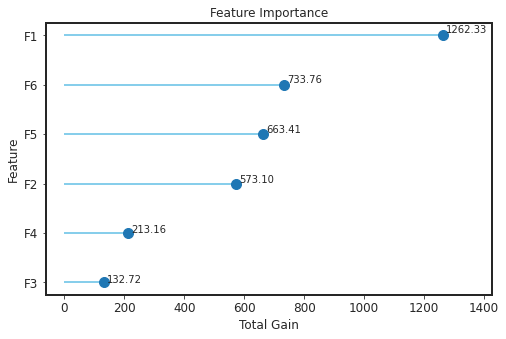

In [10]:
clf.plot_feature_importance()

In [11]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.73965067, 0.5696501 , 0.99523526, 0.9484255 , 0.8447806 ,
       0.82250917, 0.6434073 , 0.94061166, 0.98938864, 0.9988084 ],
      dtype=float32)

In [12]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

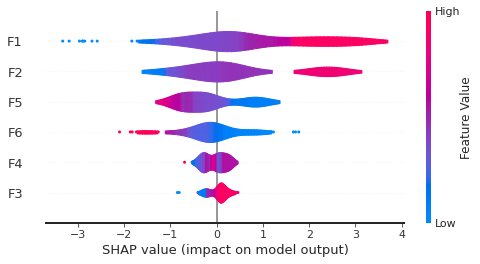

In [13]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

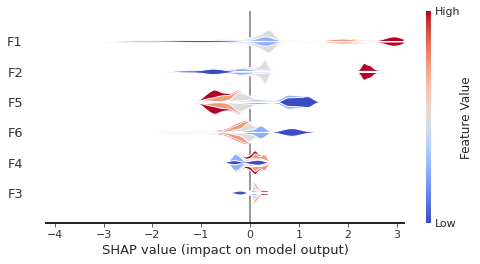

In [14]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

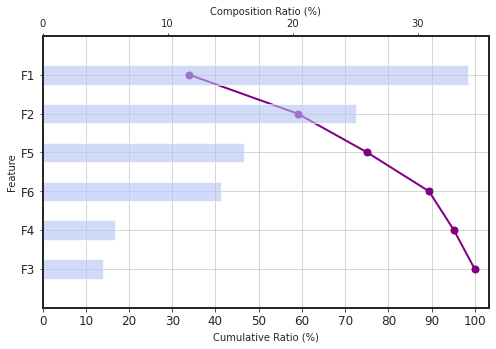

In [15]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [16]:
clf.shap_values_test_[:10]

array([[-1.29101670e+00, -7.59483695e-01,  4.23069239e-01,
         7.15033263e-02,  8.11926782e-01,  1.83317453e-01],
       [ 2.80811101e-01, -7.84179568e-01, -3.91910583e-01,
        -7.42497072e-02, -2.15765968e-01, -1.39118791e-01],
       [ 2.23853612e+00,  2.24254704e+00,  5.89059219e-02,
        -1.92948282e-02, -6.92405522e-01, -9.13755521e-02],
       [ 1.97109222e+00,  2.62834191e-01,  8.69086683e-02,
         2.59986520e-01, -7.12282360e-01, -5.61602592e-01],
       [ 2.24647950e-02, -1.39900184e+00, -4.01935488e-01,
        -9.58486274e-02,  7.84132004e-01,  1.17958856e+00],
       [ 4.06535149e-01, -5.99463470e-04, -2.79712349e-01,
         5.79649955e-02, -1.13711789e-01, -1.41872466e-01],
       [ 3.46254379e-01, -1.08612394e+00,  1.58513725e-01,
         6.82047531e-02, -2.86880642e-01, -2.14622274e-01],
       [ 4.13488388e-01,  1.02422154e+00,  5.96283525e-02,
         5.66690862e-02, -2.76417404e-01, -1.19996436e-01],
       [ 3.53629142e-01,  2.50538158e+00,  5.481

In [17]:
clf.shap_values_train_[:10]

array([[ 1.8890705 ,  2.5171251 , -0.15341438, -0.32906467, -0.78498584,
        -0.3744133 ],
       [ 0.3248044 , -0.2342411 ,  0.04329606,  0.23779924, -0.27085415,
        -0.28651807],
       [ 0.27552384, -1.3393304 , -0.4149736 ,  0.03477486,  0.1096679 ,
         0.14510901],
       [ 2.8261237 ,  2.386949  ,  0.05342117, -0.19627506, -0.03355521,
         0.02238344],
       [ 2.8193345 ,  0.34072563,  0.07263777,  0.17394564, -0.25422522,
        -1.3115385 ],
       [ 1.8913594 ,  2.5171251 , -0.1045079 , -0.24317099, -0.7901514 ,
        -0.42828214],
       [ 1.9564734 ,  0.9576397 ,  0.05829946, -0.24200746, -0.46703762,
        -0.19142887],
       [ 0.29071796,  0.11359535,  0.23424551, -0.12817226, -0.22862864,
         1.0447849 ],
       [ 0.10406707, -0.04654092,  0.06785324,  0.04517091,  0.9123624 ,
         0.08266833],
       [ 0.18870184, -1.4113625 ,  0.15851372,  0.12719016, -0.2572527 ,
        -0.25356317]], dtype=float32)

In [18]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1262.331832
1,F6,733.761238
2,F5,663.409492
3,F2,573.096915
4,F4,213.159127
5,F3,132.719380


In [19]:
clf.model_

-----
# XGBoostCVClassifier

In [20]:
help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification:

class XGBoostCVClassifier(XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None, callbacks=False, verbose=True)
 |  
 |  XGBoost CV Classifier.
 |  This is subclass of XGBoostClassifier to run xgboost.cv()
 |  model with n-folds cross-validation and train model based on
 |  the best number of boosting round to avoid over-fitting. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. In this case, cross-validation part on the train
 |  set decrease the possibility of over-fitting.
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html

## Example

In [21]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [22]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [24]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 191 -*- 4-Folds CV LOGLOSS: Train = 0.232 +/- 0.008 -*- Test = 0.320 +/- 0.025 *-*


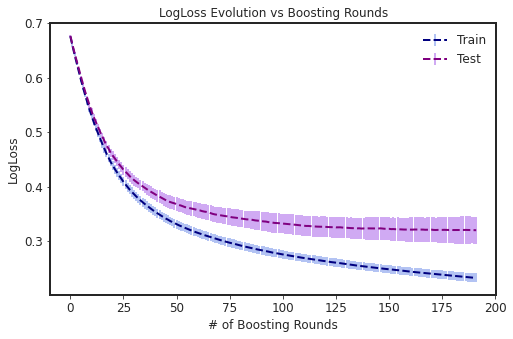

In [25]:
clf.plot_cv_results()

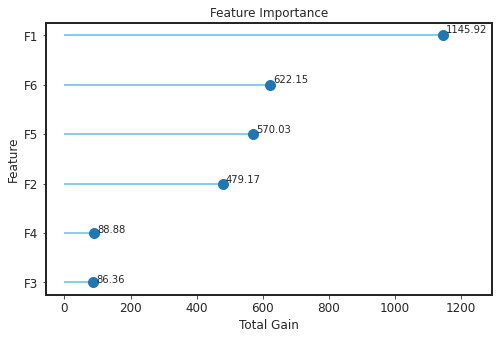

In [26]:
clf.plot_feature_importance()

In [27]:
# predic proba (or clf.y_pred_proba_)
y_pred_proba = clf.predict_proba(X_test, y_test)
y_pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [28]:
# (or clf.y_pred_proba_)
clf.y_pred_proba_[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [29]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

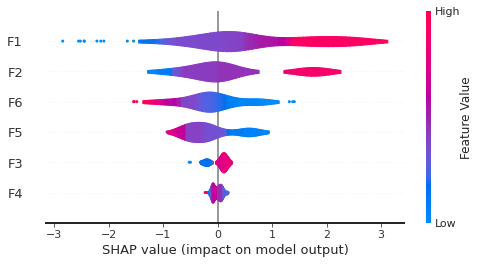

In [30]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

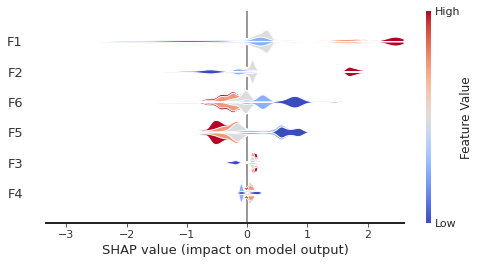

In [31]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

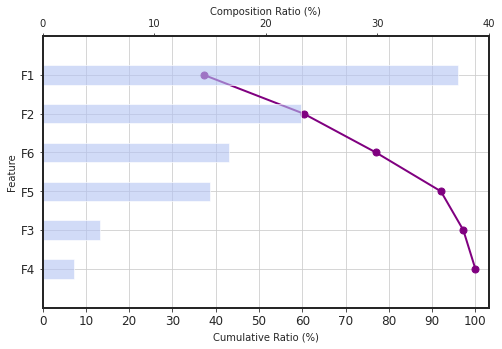

In [32]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [33]:
clf.shap_values_test_[:10]

array([[-1.17578661e+00, -5.86567044e-01,  2.24011347e-01,
         1.57289244e-02,  5.16849458e-01,  1.82012349e-01],
       [ 2.63391405e-01, -6.70697689e-01, -3.13290775e-01,
        -2.99329627e-02, -1.77391380e-01, -9.14573073e-02],
       [ 1.92844176e+00,  1.65123546e+00,  6.71078265e-02,
        -1.91674568e-04, -4.64400291e-01, -2.17012703e-01],
       [ 1.73300028e+00,  5.55277169e-02,  7.87695572e-02,
         7.93843195e-02, -5.03318131e-01, -6.46094084e-01],
       [-8.95560607e-02, -1.23228216e+00, -3.07602823e-01,
        -7.56613836e-02,  5.68822742e-01,  9.30051088e-01],
       [ 2.82156050e-01, -1.97538398e-02, -2.15325534e-01,
         6.93768915e-03, -1.98684931e-01, -1.11096114e-01],
       [ 2.41128638e-01, -9.37509894e-01,  1.55264497e-01,
        -3.11029796e-03, -2.40322769e-01, -1.19882606e-01],
       [ 3.48925084e-01,  6.94350719e-01,  7.06390738e-02,
         5.83638158e-03, -1.72579139e-01, -9.74345058e-02],
       [ 2.96836704e-01,  1.69714773e+00,  1.374

In [34]:
clf.shap_values_train_[:10]

array([[ 1.6810727 ,  1.8670248 , -0.12494415, -0.11206084, -0.5291322 ,
        -0.4470591 ],
       [ 0.20235999, -0.23255867,  0.05476505,  0.06951104, -0.21339028,
        -0.4764193 ],
       [ 0.15221135, -1.1012809 , -0.32120004,  0.01052977,  0.04009805,
         0.23228301],
       [ 2.3585417 ,  1.646324  ,  0.06655529, -0.08806157, -0.11101343,
         0.0118833 ],
       [ 2.3252146 ,  0.07344273,  0.06707823,  0.1696119 , -0.47139165,
        -1.3900161 ],
       [ 1.6970465 ,  1.8670248 , -0.12494415, -0.07160836, -0.5291322 ,
        -0.4470591 ],
       [ 1.6877612 ,  0.63464016,  0.06441025, -0.0825933 , -0.2945922 ,
        -0.23303552],
       [ 0.25127745,  0.03300017,  0.15304364, -0.10549548, -0.1993008 ,
         0.8770816 ],
       [ 0.12158564, -0.06782506,  0.08321874,  0.01529711,  0.55117816,
         0.2280842 ],
       [ 0.18574946, -1.0985618 ,  0.1552645 ,  0.02025529, -0.2360702 ,
        -0.43954518]], dtype=float32)

In [35]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
187,0.233434,0.008174,0.320090,0.025060
188,0.233021,0.008195,0.320024,0.024866
189,0.232621,0.008224,0.320062,0.024701
190,0.232216,0.008193,0.319890,0.024903
191,0.231895,0.008241,0.319651,0.024945


In [36]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118


-----
# GLMNetCVClassifier

In [37]:
help(GLMNetCVClassifier)

Help on class GLMNetCVClassifier in module slickml.classification:

class GLMNetCVClassifier(builtins.object)
 |  GLMNetCVClassifier(alpha=None, n_lambda=None, n_splits=None, metric=None, scale=True, sparse_matrix=False, fit_intercept=True, cut_point=None, min_lambda_ratio=None, lambda_path=None, tol=None, max_iter=None, random_state=None, max_features=None)
 |  
 |  GLMNet CV Classifier.
 |  This is wrapper using GLM-Net to train a Regularized Linear Model
 |  via logitic regression and find the optimal penalty values through
 |  N-Folds cross validation. This function is pretty useful to train
 |  a Elastic-Net model with the ability of feature reduction. Main
 |  theoretical reference:
 |  (https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html)
 |  Parameters
 |  ----------
 |  alpha: float, optional (default=0.5)
 |      The stability parameter, 0 <= alpha <= 1: 0.0 for Ridge, 1.0 for LASSO
 |  n_lambda: int, optional (default=100)
 |      Maximum number of lambda values to com

## Example

In [38]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [39]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [41]:
# train a model
clf = GLMNetCVClassifier(alpha=0.3, 
                         n_splits=4, 
                         metric="roc_auc")
clf.fit(X_train, y_train)

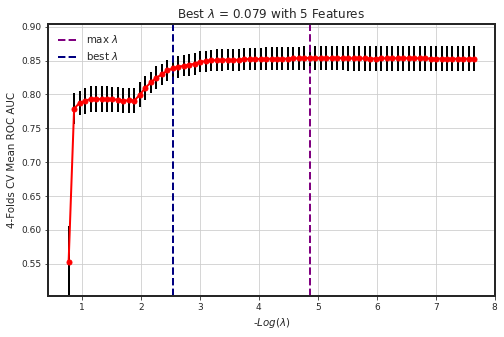

In [42]:
# plot cv_results 
clf.plot_cv_results() 

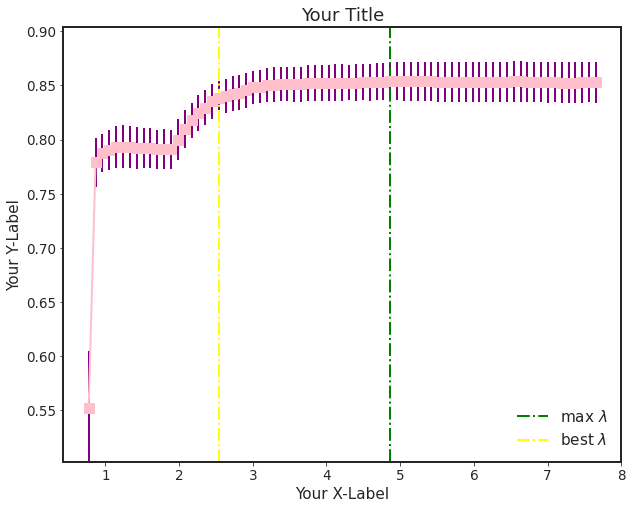

In [43]:
# plot cv_results -> you can customize it
clf.plot_cv_results(figsize=(10, 8),
                    marker="s",
                    markersize=10,
                    colors=["pink", "purple", "green", "yellow"],
                    linestyle="-.",
                    fontsize=18,
                    grid=False,
                    legend=True,
                    legendloc=4,
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    save_path=None)

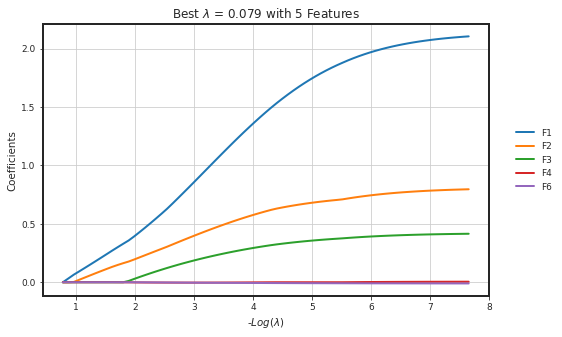

In [44]:
# plot coeff_paths
clf.plot_coeff_path()

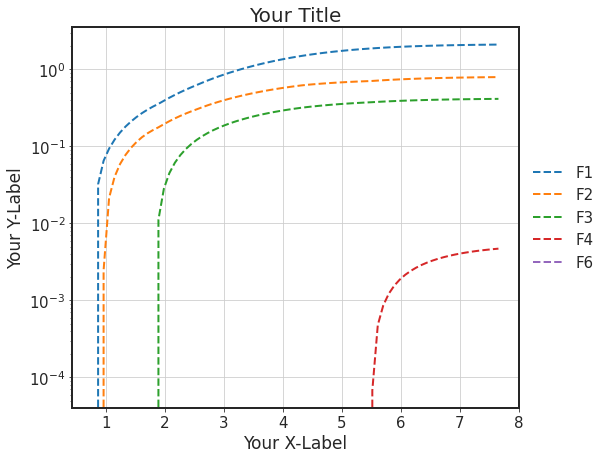

In [45]:
# plot coeff_paths
clf.plot_coeff_path(figsize=(8,7),
                    linestyle="--",
                    fontsize=20,
                    grid=False,
                    legend=True,
                    legendloc='center',
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    bbox_to_anchor=(1.1, 0.5),
                    yscale="log",
                    save_path=None)

In [46]:
# pred proba (or clf.y_pred_proba_)
# y_test in optional
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([0.67226913, 0.78299293, 0.9004733 , 0.82784728, 0.7608207 ,
       0.81398305, 0.75245062, 0.84565895, 0.88294328, 0.95675485])

In [47]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [48]:
# non-zero coeffs (or clf.get_coeffs())
clf.coeff_

,feature,coeff
0,F1,0.628709
1,F2,0.304051
2,F3,0.122064
3,F6,-0.002377
4,F4,-0.002830


In [49]:
# intercept (or clf.get_intercept())
clf.intercept_

-2.8918088248829035

In [50]:
# model cv_results_ (or clf.get_cv_results())
clf.cv_results_

,F1_coeff_path,F2_coeff_path,F3_coeff_path,F4_coeff_path,F5_coeff_path,F6_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.494283,0.461814,0.052471,0.052471
1,0.032361,0.000000,0.000000,0.000000,0.000000,0.000000,1.304279,0.420788,0.023046,0.023046
2,0.065111,0.002466,0.000000,0.000000,0.000000,0.000000,1.100865,0.383406,0.017789,0.017789
3,0.093595,0.021401,0.000000,0.000000,0.000000,0.000000,0.845588,0.349346,0.018629,0.018629
4,0.122470,0.040299,0.000000,0.000000,0.000000,0.000000,0.589259,0.318311,0.019291,0.019291
...,...,...,...,...,...,...,...,...,...,...
70,2.089139,0.789987,0.412325,0.004387,-0.004277,-0.010136,-10.324242,0.000686,0.018707,0.018707
71,2.093495,0.791668,0.413092,0.004477,-0.004257,-0.010174,-10.350203,0.000625,0.018627,0.018627
72,2.097459,0.793093,0.413756,0.004560,-0.004244,-0.010205,-10.373687,0.000569,0.018564,0.018564
73,2.101145,0.794519,0.414402,0.004636,-0.004229,-0.010235,-10.395722,0.000519,0.018599,0.018599


In [51]:
# total model results json (or clf.get_results())
clf.results_

{'coeff': {'F1': 0.6287092095448299,
  'F2': 0.3040507930202481,
  'F3': 0.12206397915779621,
  'F4': -0.002830259135730113,
  'F6': -0.002376517076936571},
 'coeff_path': {'F1': [0.0,
   0.03236090391346197,
   0.06511061410640039,
   0.09359541767104496,
   0.12246981453401501,
   0.1516859436039661,
   0.18119186741227766,
   0.2109357780834762,
   0.24086804969630915,
   0.2709384353530541,
   0.3003152754199013,
   0.3292722939886062,
   0.3576320257136777,
   0.39233268570671215,
   0.4294309743478789,
   0.4674892216087908,
   0.506483989938108,
   0.5463825769284869,
   0.5869590682632343,
   0.6287092095448299,
   0.6737738263227144,
   0.719885889279804,
   0.7665461663449359,
   0.8133927328238173,
   0.8608222828207376,
   0.9084855183248143,
   0.9562586709169699,
   1.0040327472720778,
   1.051685403911485,
   1.0990932878503967,
   1.146132310998171,
   1.1928256479103934,
   1.2387856403488309,
   1.2840074699242345,
   1.328168190485673,
   1.3715631079202057,
   1.413

In [52]:
# model's fitting params (or clf.get_params())
clf.params_

{'alpha': 0.3,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 4,
 'random_state': 1367,
 'scoring': 'roc_auc',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}